In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, time, datetime
import seaborn as sns
import re

In [2]:
uber1 = pd.read_csv('uber-raw-data-apr14.csv')
uber2 = pd.read_csv('uber-raw-data-may14.csv')
uber3 = pd.read_csv('uber-raw-data-jun14.csv')
uber4 = pd.read_csv('uber-raw-data-jul14.csv')
uber5 = pd.read_csv('uber-raw-data-aug14.csv')
uber6 = pd.read_csv('uber-raw-data-sep14.csv')

In [3]:
uber3.head()

,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512


In [4]:
uber1.shape

(564516, 4)

In [5]:
frames = [uber1,uber2,uber3,uber4,uber5,uber6]
uberf = pd.concat(frames)

In [6]:
uberf.shape

(4534327, 4)

In [7]:
uberf.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [8]:
uberf.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [9]:
uberf['Date/Time'] = uberf['Date/Time'].astype('datetime64[ns]')

In [10]:
uberf.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

# Adding month, dayofweek and dayofmonth as columns

In [11]:
uberf['month'] = uberf['Date/Time'].dt.month
uberf['dayofweek'] = uberf['Date/Time'].dt.weekday
uberf['dayofmonth'] = uberf['Date/Time'].dt.day

In [12]:
uberf['day'] = uberf['Date/Time'].dt.day_name()

In [13]:
uberf['hour'] = uberf['Date/Time'].dt.hour

In [14]:
uberf.head()

,Date/Time,Lat,Lon,Base,month,dayofweek,dayofmonth,day,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,1,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,1,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,1,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,1,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,1,Tuesday,0


In [15]:
uberf.groupby('month').count().day

month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: day, dtype: int64

# Plotting trips by month

Text(0, 0.5, 'Trips in Million')

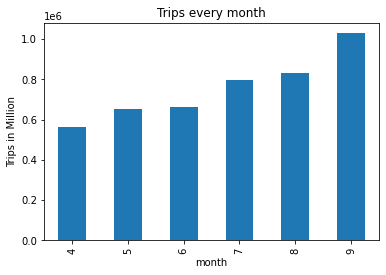

In [16]:
uberf.groupby('month').count().day.plot.bar()
plt.title("Trips every month")
plt.ylabel("Trips in Million")

In [17]:
uberf.head()

,Date/Time,Lat,Lon,Base,month,dayofweek,dayofmonth,day,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,1,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,1,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,1,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,1,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,1,Tuesday,0


In [18]:
uberf.groupby('dayofweek').count().day

dayofweek
0    541472
1    663789
2    696488
3    755145
4    741139
5    646114
6    490180
Name: day, dtype: int64

# Plotting trips by day of week

Text(0.5, 1.0, 'Trips by Days of the Week')

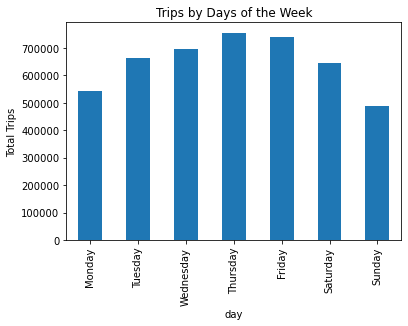

In [19]:
tripsbydays = uberf.groupby('day').count().month.reindex(index=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
tripsbydays.plot.bar()
plt.ylabel("Total Trips")
plt.title("Trips by Days of the Week")

# Plotting trips by day of month

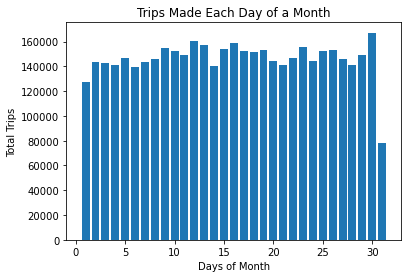

In [20]:
y = uberf.dayofmonth.value_counts().values
x = uberf.dayofmonth.value_counts().index
plt.bar(x,y)
plt.ylabel("Total Trips")
plt.xlabel("Days of Month")
plt.title("Trips Made Each Day of a Month")
plt.show()

# Plotting trips by hours

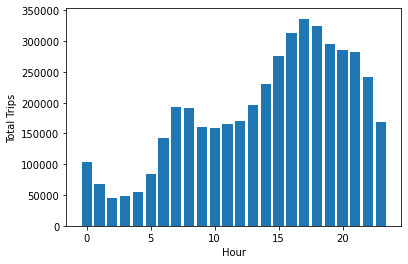

In [21]:
x = uberf.hour.value_counts().index
y = uberf.hour.value_counts().values
plt.bar(x,y)
plt.xlabel("Hour")
plt.ylabel("Total Trips")
plt.show()

In [22]:
uberf.head()

,Date/Time,Lat,Lon,Base,month,dayofweek,dayofmonth,day,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,1,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,1,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,1,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,1,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,1,Tuesday,0


# Plotting trips by hour for every month
Grouping by month and hour and then creating an array of shape (6,24) for 6 months and 24 hours

In [23]:
hourwise = uberf.groupby(["month","hour"]).count().Base
hourwise.head(25)

month  hour
4      0       11910
       1        7769
       2        4935
       3        5040
       4        6095
       5        9476
       6       18498
       7       24924
       8       22843
       9       17939
       10      17865
       11      18774
       12      19425
       13      22603
       14      27190
       15      35324
       16      42003
       17      45475
       18      43003
       19      38923
       20      36244
       21      36964
       22      30645
       23      20649
5      0       13875
Name: Base, dtype: int64

In [24]:
a = np.array(hourwise.values)
a

array([11910,  7769,  4935,  5040,  6095,  9476, 18498, 24924, 22843,
       17939, 17865, 18774, 19425, 22603, 27190, 35324, 42003, 45475,
       43003, 38923, 36244, 36964, 30645, 20649, 13875,  8186,  5372,
        5946,  6945, 10789, 21015, 27413, 25460, 20507, 20801, 22055,
       23595, 27699, 34363, 43087, 49127, 51508, 48965, 42387, 40731,
       42217, 35556, 24836, 14514,  9167,  6189,  6937,  7701, 11955,
       22030, 30834, 29771, 24298, 23584, 24155, 25233, 28937, 34428,
       41586, 48162, 50452, 45013, 38203, 40108, 40791, 35614, 24182,
       17953, 11527,  8562,  9199, 10040, 14932, 23456, 32545, 33387,
       28486, 28558, 30120, 30900, 35832, 41357, 46053, 52403, 58260,
       57268, 52332, 51859, 49528, 42218, 29346, 21451, 14471, 10105,
       10376, 11774, 16525, 24907, 34064, 34566, 30195, 30706, 31778,
       32106, 35764, 40644, 48197, 53481, 57122, 55390, 53008, 51674,
       51354, 46008, 33609, 24133, 16107, 10702, 10789, 12675, 20262,
       33307, 43314,

In [25]:
b = a.reshape(6,24)

In [26]:
b

array([[11910,  7769,  4935,  5040,  6095,  9476, 18498, 24924, 22843,
        17939, 17865, 18774, 19425, 22603, 27190, 35324, 42003, 45475,
        43003, 38923, 36244, 36964, 30645, 20649],
       [13875,  8186,  5372,  5946,  6945, 10789, 21015, 27413, 25460,
        20507, 20801, 22055, 23595, 27699, 34363, 43087, 49127, 51508,
        48965, 42387, 40731, 42217, 35556, 24836],
       [14514,  9167,  6189,  6937,  7701, 11955, 22030, 30834, 29771,
        24298, 23584, 24155, 25233, 28937, 34428, 41586, 48162, 50452,
        45013, 38203, 40108, 40791, 35614, 24182],
       [17953, 11527,  8562,  9199, 10040, 14932, 23456, 32545, 33387,
        28486, 28558, 30120, 30900, 35832, 41357, 46053, 52403, 58260,
        57268, 52332, 51859, 49528, 42218, 29346],
       [21451, 14471, 10105, 10376, 11774, 16525, 24907, 34064, 34566,
        30195, 30706, 31778, 32106, 35764, 40644, 48197, 53481, 57122,
        55390, 53008, 51674, 51354, 46008, 33609],
       [24133, 16107, 10702, 10789,

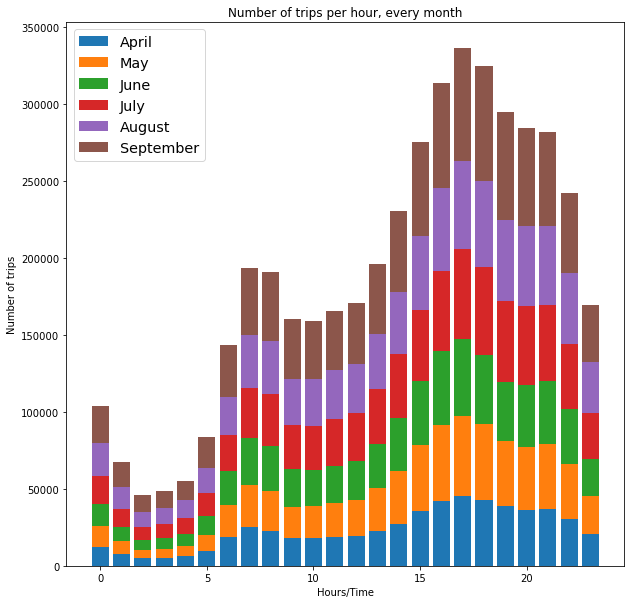

In [27]:
fig = plt.subplots(figsize = (10,10))
p1 = plt.bar(np.arange(0, 24), b[0])
p2 = plt.bar(np.arange(0, 24), b[1], bottom = b[0])
p3 = plt.bar(np.arange(0, 24), b[2], bottom = b[1]+b[0])
p4 = plt.bar(np.arange(0, 24), b[3], bottom = b[2]+b[1]+b[0])
p5 = plt.bar(np.arange(0, 24), b[4], bottom = b[3]+b[2]+b[1]+b[0])
p6 = plt.bar(np.arange(0, 24), b[5], bottom = b[4]+b[3]+b[2]+b[1]+b[0])
plt.title("Number of trips per hour, every month")
plt.xlabel("Hours/Time")
plt.ylabel("Number of trips")
plt.legend([p1,p2,p3,p4,p5,p6],["April","May","June","July","August","September"],loc=2,fontsize="x-large")

# Plotting trips by day of week for every month
Grouping by month and dayofweek and then creating an array of shape (6,7) for 6 months and 7 days of a week

In [28]:
daywise = uberf.groupby(['month',"dayofweek"]).size()
daywise

month  dayofweek
4      0             60861
       1             91185
       2            108631
       3             85067
       4             90303
       5             77218
       6             51251
5      0             63846
       1             76662
       2             89857
       3            128921
       4            133991
       5            102990
       6             56168
6      0             94655
       1             88134
       2             99654
       3            115325
       4            105056
       5             81364
       6             79656
7      0             93189
       1            137454
       2            147717
       3            148439
       4            102735
       5             90260
       6             76327
8      0             91633
       1            107124
       2            115256
       3            124117
       4            148674
       5            132225
       6            110246
9      0            137288
       1   

In [29]:
f = daywise.values

In [30]:
f = f.reshape(6,7)

In [31]:
f

array([[ 60861,  91185, 108631,  85067,  90303,  77218,  51251],
       [ 63846,  76662,  89857, 128921, 133991, 102990,  56168],
       [ 94655,  88134,  99654, 115325, 105056,  81364,  79656],
       [ 93189, 137454, 147717, 148439, 102735,  90260,  76327],
       [ 91633, 107124, 115256, 124117, 148674, 132225, 110246],
       [137288, 163230, 135373, 153276, 160380, 162057, 116532]])

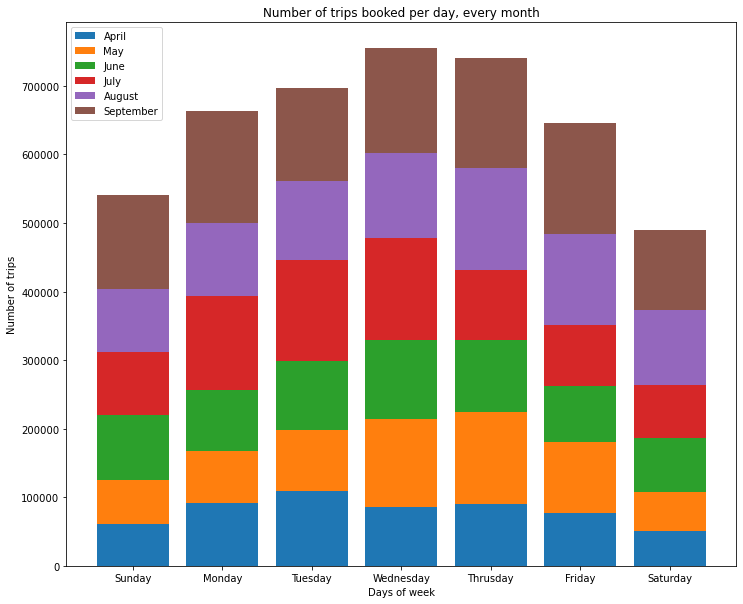

In [32]:
g = ['Sunday','Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday']
plt.subplots(figsize = (12,10))
q1 = plt.bar(g,f[0])
q2 = plt.bar(g,f[1],bottom = f[0])
q3 = plt.bar(g,f[2],bottom = f[0]+f[1])
q4 = plt.bar(g,f[3],bottom = f[0]+f[1]+f[2])
q5 = plt.bar(g,f[4],bottom = f[0]+f[1]+f[2]+f[3])
q6 = plt.bar(g,f[5],bottom = f[0]+f[1]+f[2]+f[3]+f[4])
plt.title("Number of trips booked per day, every month")
plt.xlabel("Days of week")
plt.ylabel("Number of trips")
plt.legend([q1,q2,q3,q4,q5,q6],["April","May","June","July","August","September"],loc=2,fontsize="medium")

# Plotting trips by month for every day of a week
Grouping by month and dayofweek and then creating an array of shape (7,6) for 7 days of a week and 6 months

In [33]:
h = uberf.groupby(["dayofweek","month"]).size()
h = h.values.reshape((7,6))
x = np.arange(1,22,3)
h

array([[ 60861,  63846,  94655,  93189,  91633, 137288],
       [ 91185,  76662,  88134, 137454, 107124, 163230],
       [108631,  89857,  99654, 147717, 115256, 135373],
       [ 85067, 128921, 115325, 148439, 124117, 153276],
       [ 90303, 133991, 105056, 102735, 148674, 160380],
       [ 77218, 102990,  81364,  90260, 132225, 162057],
       [ 51251,  56168,  79656,  76327, 110246, 116532]])

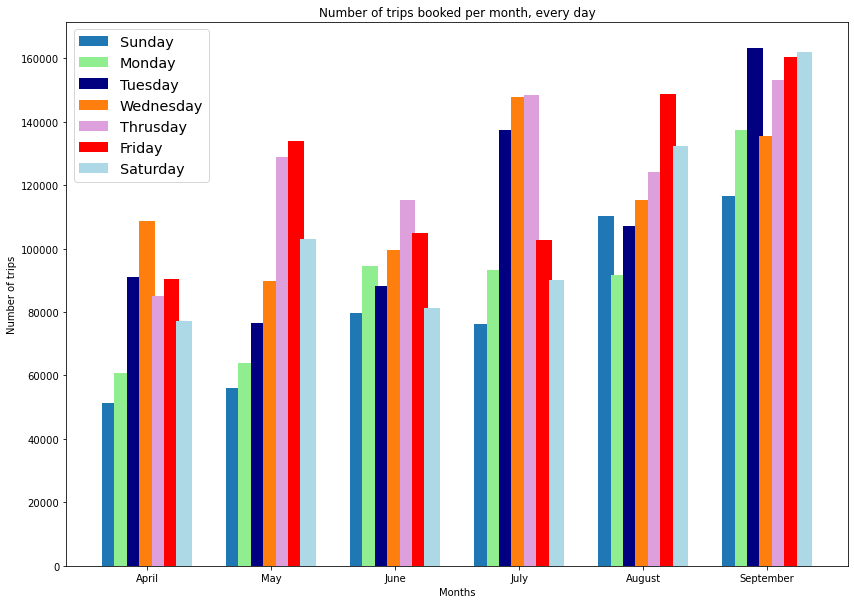

In [34]:
x= np.arange(1,24,4)
plt.subplots(figsize = (14,10))
plt.bar(x-1.2,h[6],width = 0.5)
plt.bar(x-0.8,h[0],width = 0.5,color="lightgreen")
plt.bar(x-0.4,h[1],width = 0.5,color="navy")
plt.bar(x,h[2],width = 0.5)
plt.bar(x+0.4,h[3],width = 0.5,color="plum")
plt.bar(x+0.8,h[4],width = 0.5,color="r")
plt.bar(x+1.2,h[5],width = 0.5,color="lightblue")
plt.xticks(x,['April','May','June','July','August','September'])
plt.title("Number of trips booked per month, every day")
plt.xlabel("Months")
plt.ylabel("Number of trips")
plt.legend(g,fontsize="x-large")

# Plotting trips by base name

In [35]:
bases = uberf.groupby("Base").size()

Text(0, 0.5, 'Trips in million')

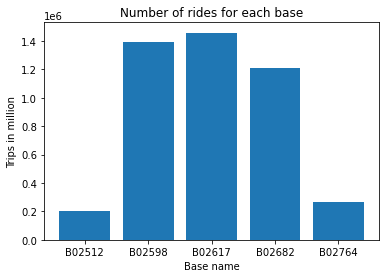

In [36]:
plt.bar(bases.index,bases.values)
plt.title("Number of rides for each base")
plt.xlabel("Base name")
plt.ylabel("Trips in million")

# Plotting trips by base name for every month

In [37]:
c = uberf.groupby(["month","Base"]).size().values.reshape(6,5)

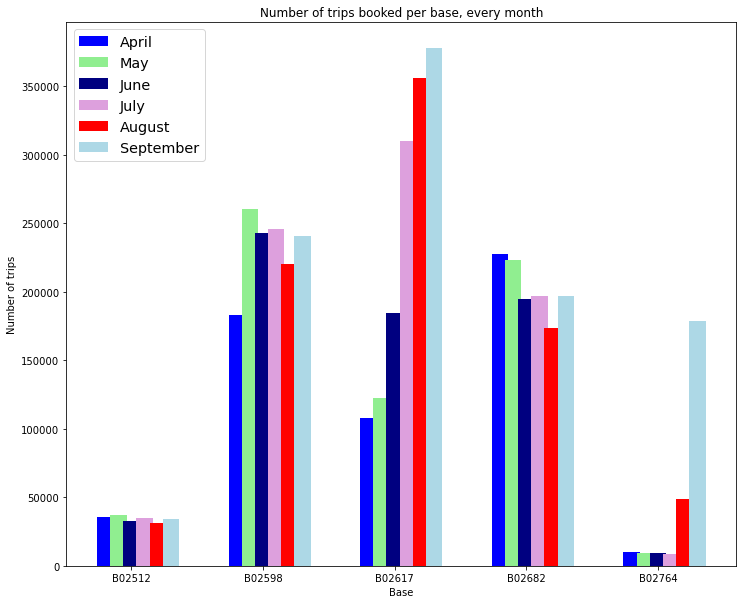

In [38]:
d = np.arange(1,20,4)
d
plt.subplots(figsize = (12,10))
plt.bar(d-0.8,c[0],width = 0.5, color= "blue")
plt.bar(d-0.4,c[1],width = 0.5, color= 'lightgreen')
plt.bar(d,c[2],width = 0.5, color= 'navy')
plt.bar(d+0.4,c[3],width = 0.5, color= 'plum')
plt.bar(d+0.8,c[4],width = 0.5, color= 'r')
plt.bar(d+1.2,c[5],width = 0.5, color= 'lightblue')
plt.xticks(d,['B02512', 'B02598', 'B02617', 'B02682', 'B02764'])
plt.title("Number of trips booked per base, every month")
plt.xlabel("Base")
plt.ylabel("Number of trips")
plt.legend(['April','May','June','July','August','September'],loc=2,fontsize = "x-large")

In [39]:
uberf.head()

,Date/Time,Lat,Lon,Base,month,dayofweek,dayofmonth,day,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,1,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,1,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,1,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,1,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,1,Tuesday,0


# 2D Heat Map plot for trips for every hour of every day of a month

In [40]:
h = uberf.groupby(["hour","dayofmonth"]).size().values.reshape(24,31)

Text(0.5, 1.0, '2-D Heat Map - Number of trips every hour of every day')

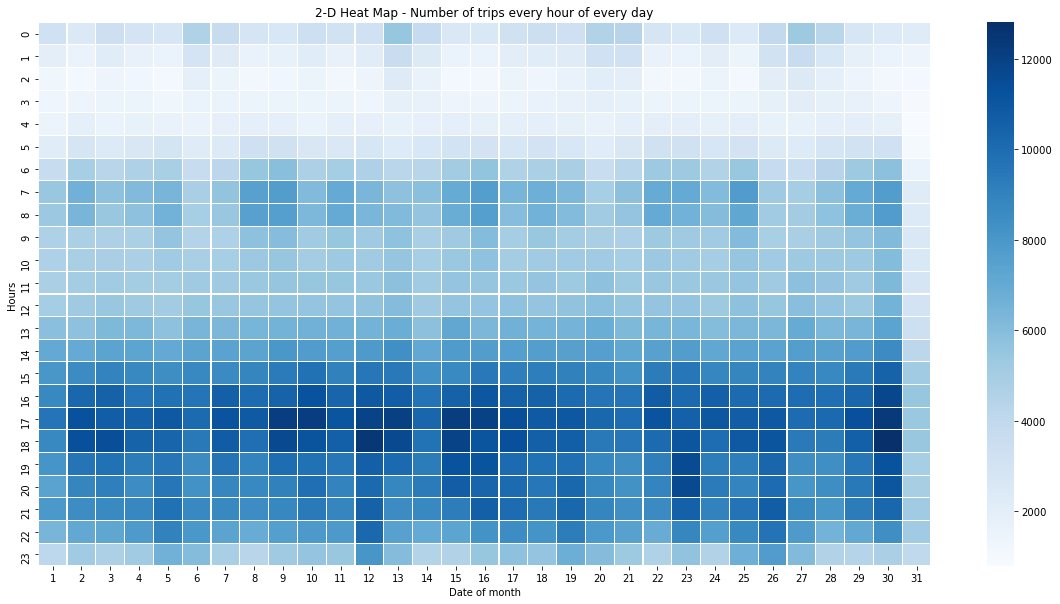

In [41]:
axx = plt.subplots(figsize = (20,10))
ax = sns.heatmap(h , linewidth = 0.01,linecolor = 'white' , cmap = 'Blues')
ax.set_xticklabels(np.arange(1,32))
ax.set_xlabel('Date of month')
ax.set_ylabel('Hours')
plt.title( "2-D Heat Map - Number of trips every hour of every day" )

# 2D Heat Map plot for trips for day of week of every month

In [42]:
mew = uberf.groupby(["month","dayofweek"]).size().values.reshape((6,7))
mew

array([[ 60861,  91185, 108631,  85067,  90303,  77218,  51251],
       [ 63846,  76662,  89857, 128921, 133991, 102990,  56168],
       [ 94655,  88134,  99654, 115325, 105056,  81364,  79656],
       [ 93189, 137454, 147717, 148439, 102735,  90260,  76327],
       [ 91633, 107124, 115256, 124117, 148674, 132225, 110246],
       [137288, 163230, 135373, 153276, 160380, 162057, 116532]])

Text(0.5, 1.0, '2-D Heat Map - Number of trips every day of week, every month')

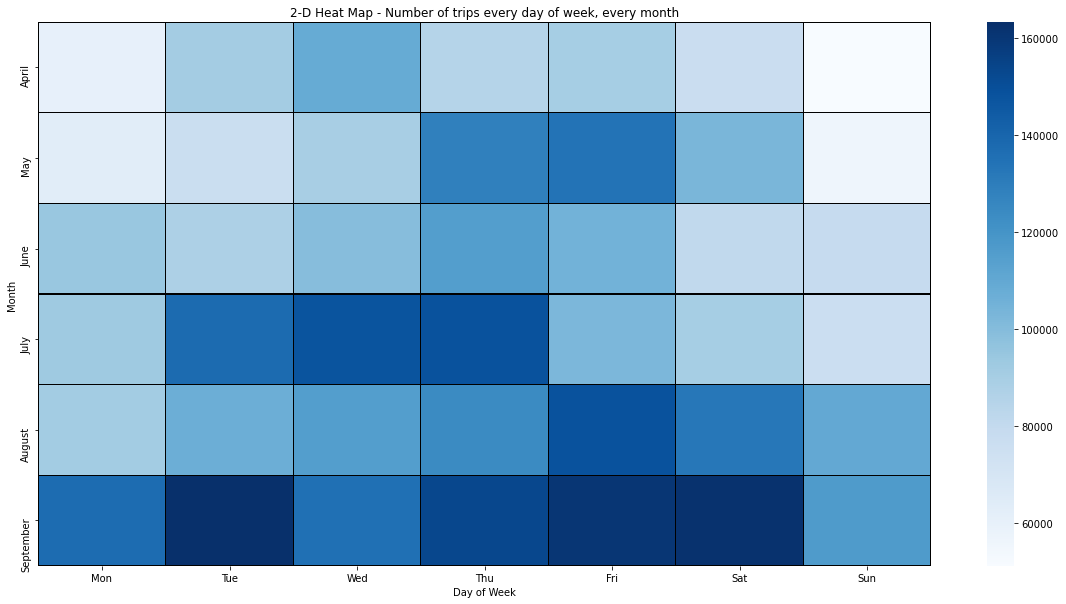

In [43]:
ay = plt.subplots(figsize = (20,10))
ayy = sns.heatmap(mew , linewidth = 0.01,linecolor = 'black' , cmap = 'Blues')
ayy.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ayy.set_yticklabels(['April','May','June','July','August','September'])
ayy.set_xlabel('Day of Week')
ayy.set_ylabel('Month')
plt.title("2-D Heat Map - Number of trips every day of week, every month")

# 2D Heat Map plot for trips for every month for each base name

In [44]:
meb = uberf.groupby(["month","Base"]).size().values.reshape((6,5))
meb

array([[ 35536, 183263, 108001, 227808,   9908],
       [ 36765, 260549, 122734, 222883,   9504],
       [ 32509, 242975, 184460, 194926,   8974],
       [ 35021, 245597, 310160, 196754,   8589],
       [ 31472, 220129, 355803, 173280,  48591],
       [ 34370, 240600, 377695, 197138, 178333]])

Text(0.5, 1.0, '2-D Heat Map - Number of trips every month for every base')

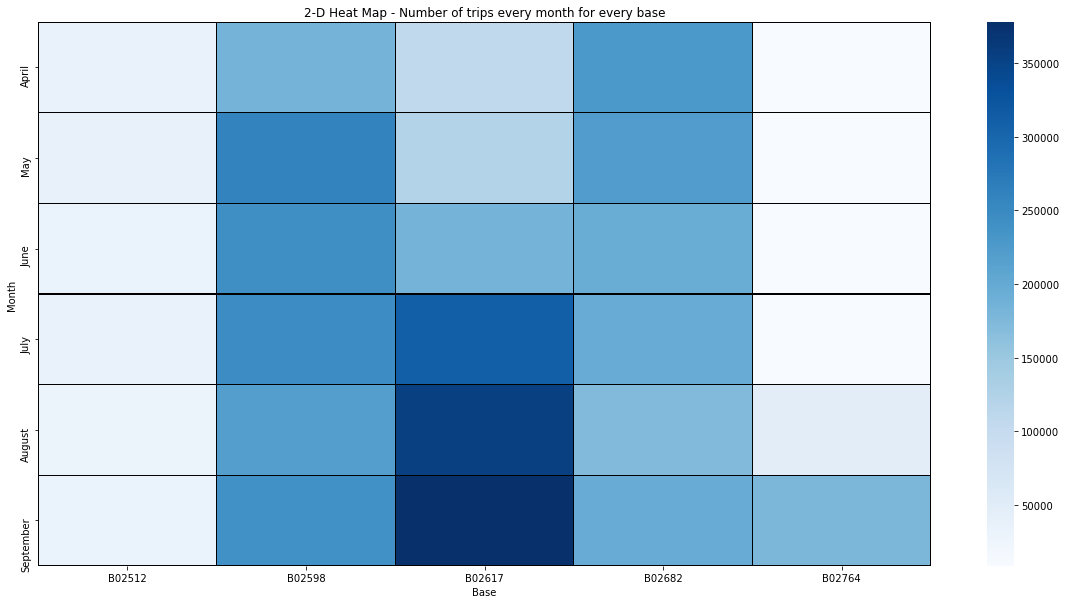

In [45]:
az = plt.subplots(figsize = (20,10))
azz = sns.heatmap(meb , linewidth = 0.01,linecolor = 'black' , cmap = 'Blues')
azz.set_xticklabels(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'])
azz.set_yticklabels(['April','May','June','July','August','September'])
azz.set_xlabel('Base')
azz.set_ylabel('Month')
plt.title( "2-D Heat Map - Number of trips every month for every base" )

# 2D Heat Map plot for trips for every day of week for each base

In [46]:
web = uberf.groupby(["dayofweek","Base"]).size().values.reshape((7,5))
web

array([[ 25460, 163542, 176416, 143372,  32682],
       [ 31670, 202378, 214167, 176198,  39376],
       [ 32929, 216644, 222669, 189863,  34383],
       [ 35032, 235157, 240216, 205091,  39649],
       [ 33319, 229908, 234379, 201594,  41939],
       [ 26773, 198832, 206554, 170160,  43795],
       [ 20490, 146652, 164452, 126511,  32075]])

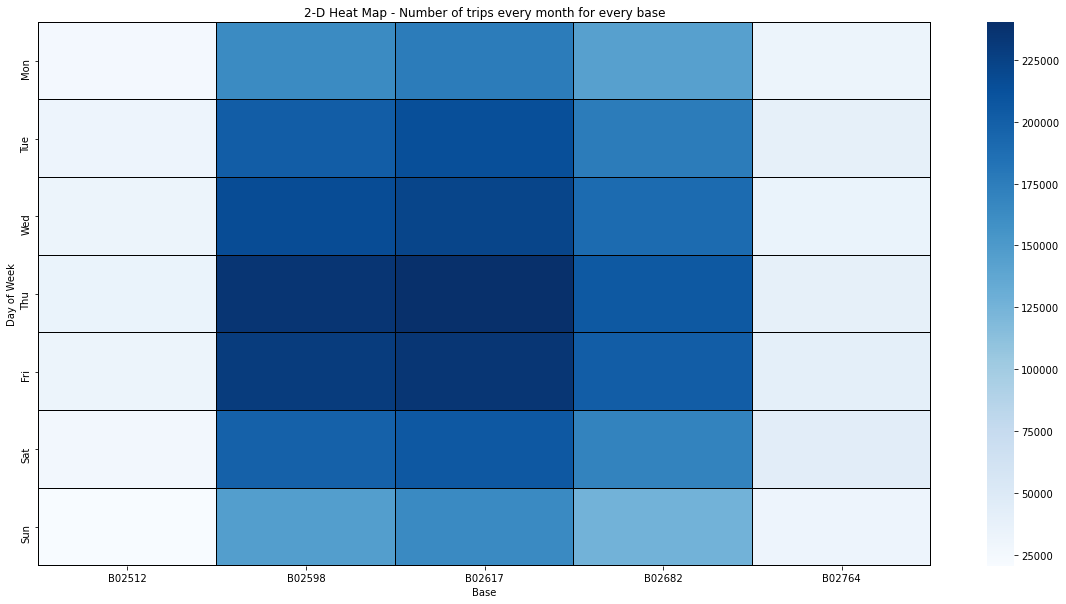

In [47]:
ap = plt.subplots(figsize = (20,10))
app = sns.heatmap(web , linewidth = 0.01,linecolor = 'black' , cmap = 'Blues')
app.set_xticklabels(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'])
app.set_yticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
app.set_xlabel('Base')
app.set_ylabel('Day of Week')
plt.title( "2-D Heat Map - Number of trips every month for every base" )
plt.show()

In [48]:
!pip install geopandas


In [49]:
import geopandas as gpd

# Utilising Geopandas to print a map of New York City

<AxesSubplot:>

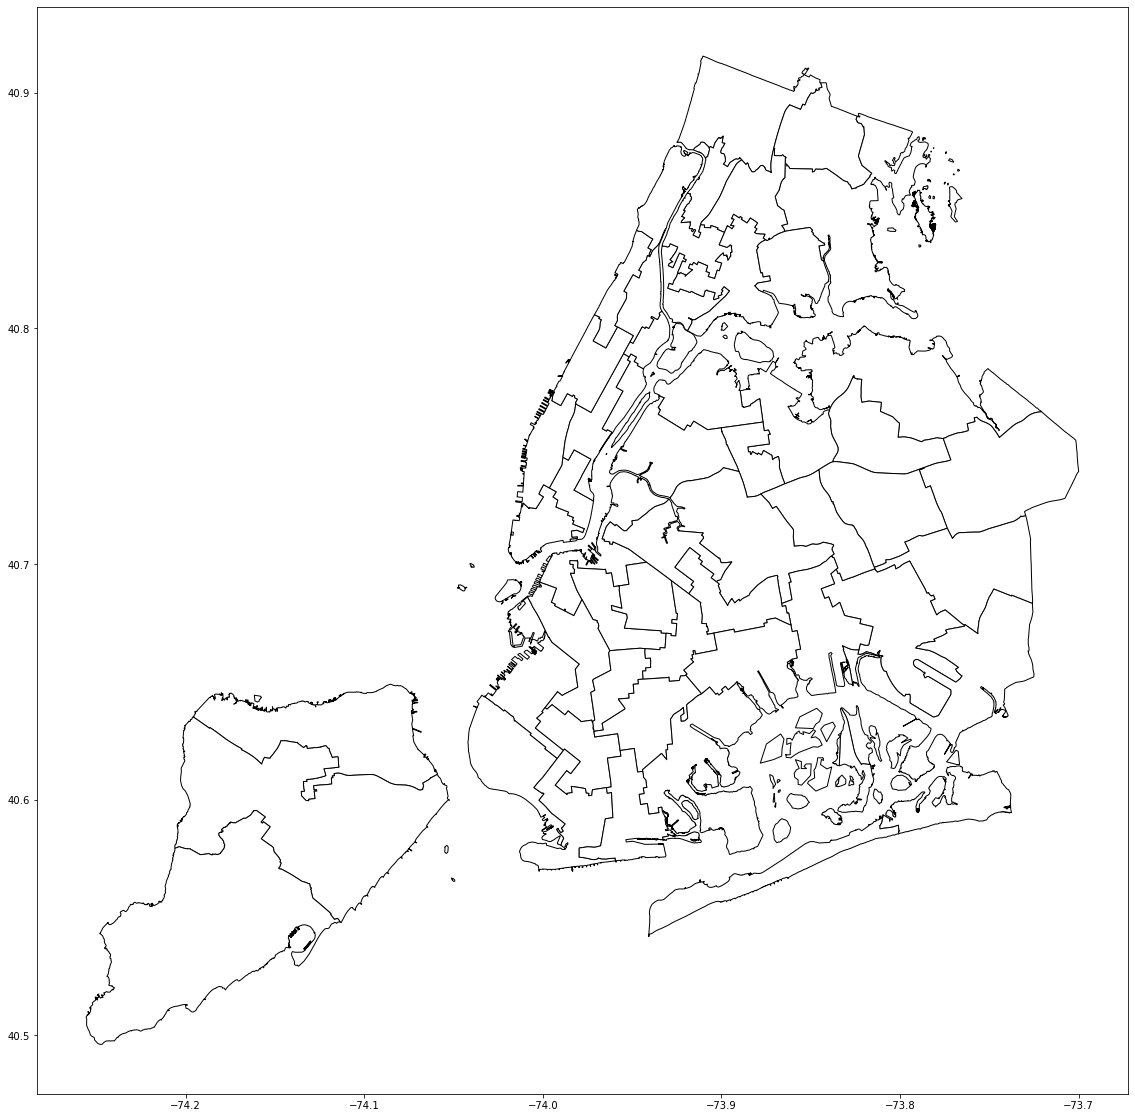

In [50]:
nycmap = gpd.read_file("https://raw.githubusercontent.com/dwillis/nyc-maps/master/city_council.geojson")
nycmap.plot(figsize = (20,20), color = 'white', edgecolor = 'black')

In [51]:
uberf.size

40808943

# Creating a new dataframe to limit latitude and longitude for nearby city areas

In [52]:
uberfa = uberf[(uberf.Lon<-73.6) & (uberf.Lat < 41) & (uberf.Lon>-74.3) & (uberf.Lat > 40.5)]
uberfa.size

40648932

In [53]:
gdfa = gpd.GeoDataFrame(uberfa, geometry = gpd.points_from_xy(uberfa.Lon,uberfa.Lat))

# Locating each trip made on the NYC map from Apr 2014 to Sept 2014

<AxesSubplot:>

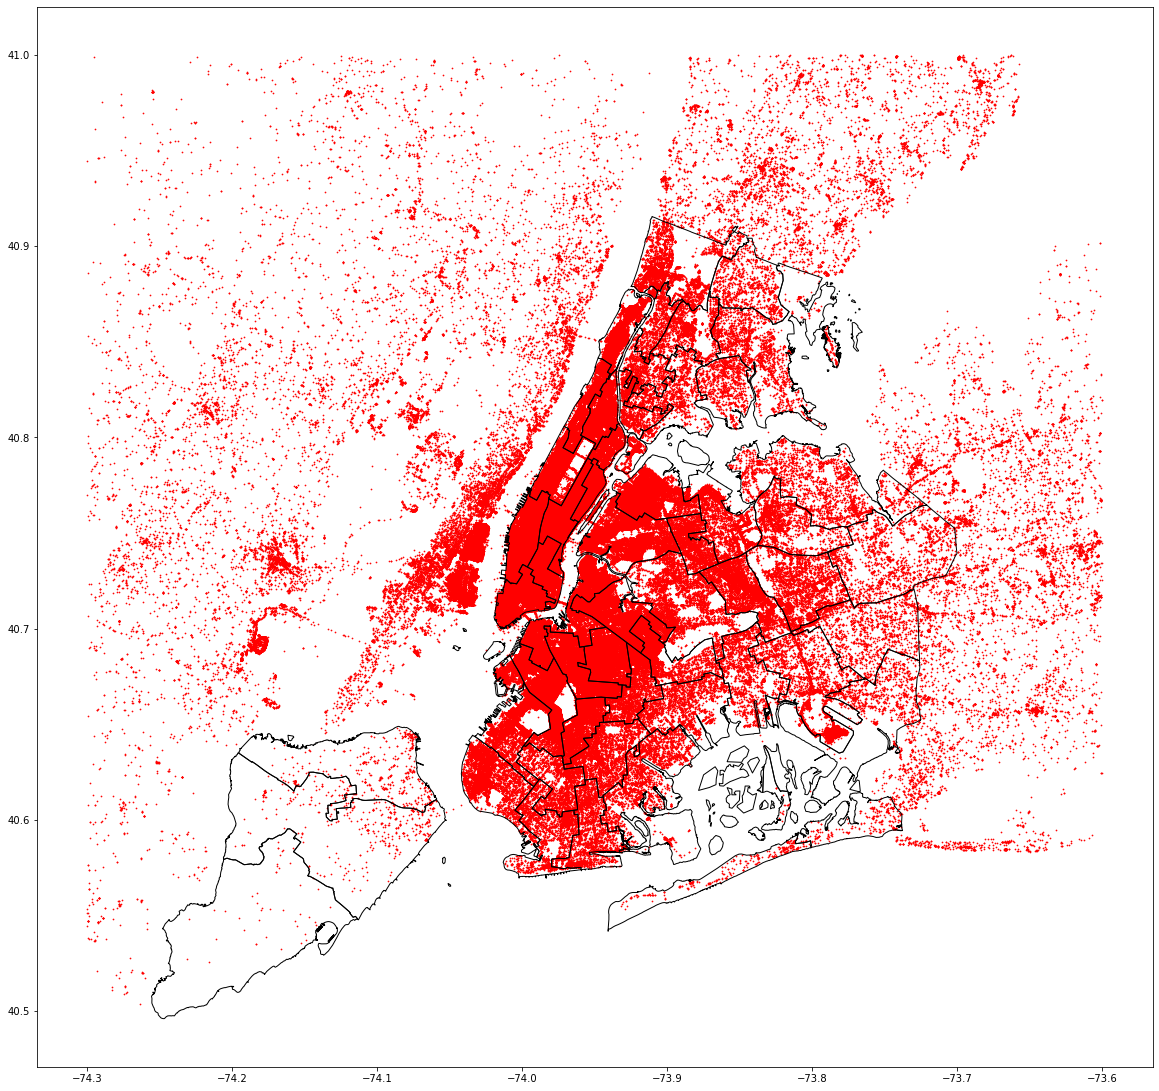

In [54]:
ax = gdfa.plot(figsize = (20,20), color = 'red', markersize = 0.5 )
nycmap.plot(color = 'none',edgecolor = 'black', ax = ax)

In [55]:
uberfa.head()

,Date/Time,Lat,Lon,Base,month,dayofweek,dayofmonth,day,hour,geometry
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,1,Tuesday,0,POINT (-73.95490 40.76900)
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,1,Tuesday,0,POINT (-74.03450 40.72670)
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,1,Tuesday,0,POINT (-73.98730 40.73160)
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,1,Tuesday,0,POINT (-73.97760 40.75880)
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,1,Tuesday,0,POINT (-73.97220 40.75940)


# Creating a new dataframe for trips made within city area on Sundays

In [56]:
uberfc = uberf[(uberf.Lon<-73.95) & (uberf.Lat < 40.65) & (uberf.Lon>-74.05) & (uberf.Lat > 40.55) & (uberf.day=="Sunday")]
uberfc.size

49824

In [57]:
gdfc = gpd.GeoDataFrame(uberfc, geometry = gpd.points_from_xy(uberfc.Lon,uberfc.Lat))

# Creating a new dataframe for trips made within city area on Sunday midnights

In [58]:
uberfb = uberfa[(uberfa.day=="Sunday") & (uberfa.hour==0)]
uberfb.size

325960

In [59]:
gdfb = gpd.GeoDataFrame(uberfb, geometry = gpd.points_from_xy(uberfb.Lon,uberfb.Lat))

# Locating each trip made on the NYC map on Sunday midnights from Apr 2014 to Sept 2014

<AxesSubplot:>

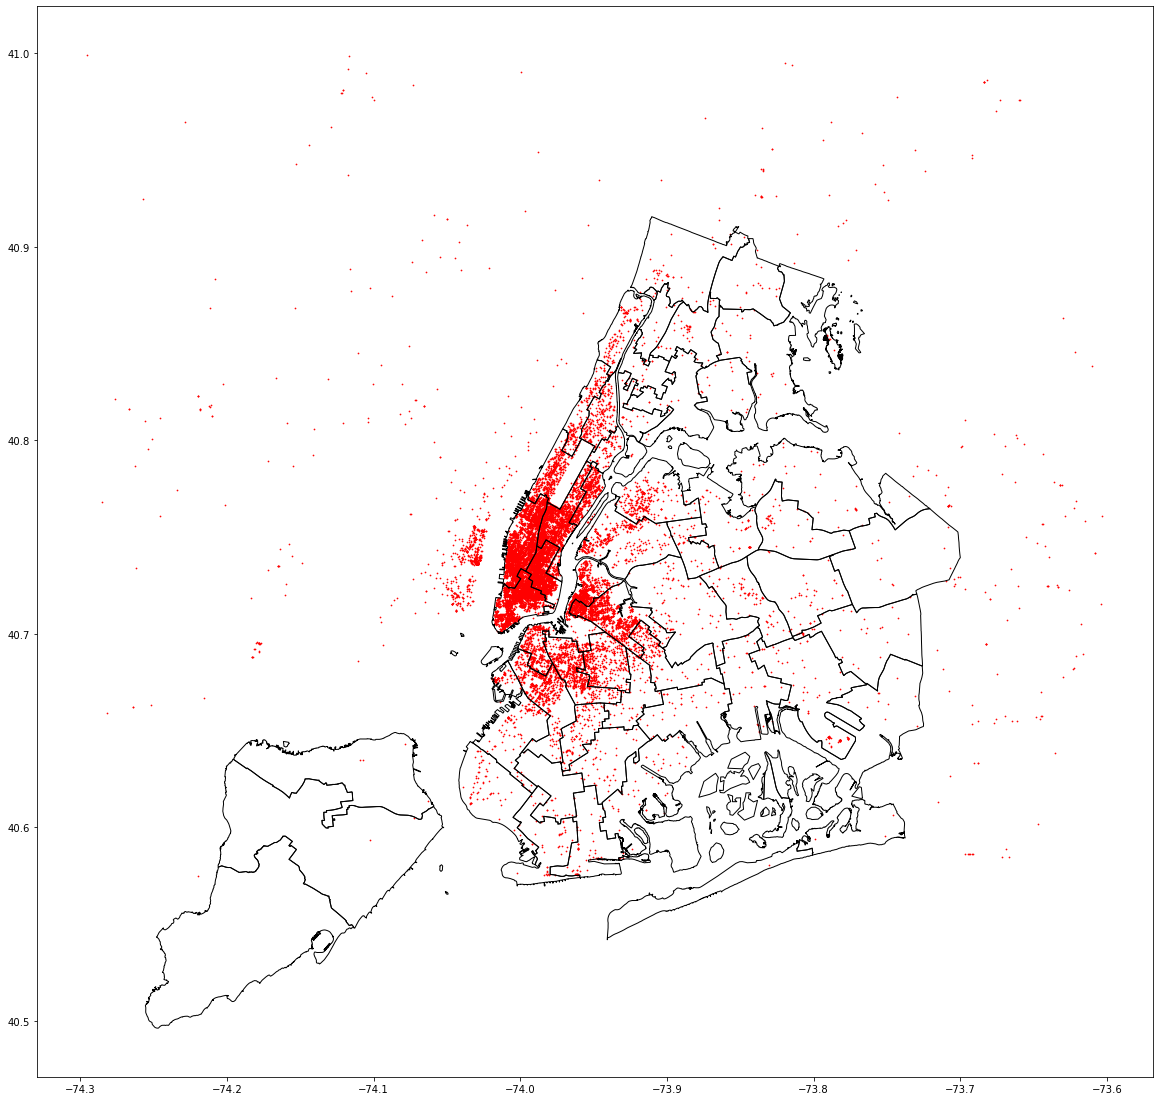

In [60]:
ax = gdfb.plot(figsize = (20,20), color = 'red', markersize = 0.5 )
nycmap.plot(color = 'none',edgecolor = 'black', ax = ax)

<AxesSubplot:>

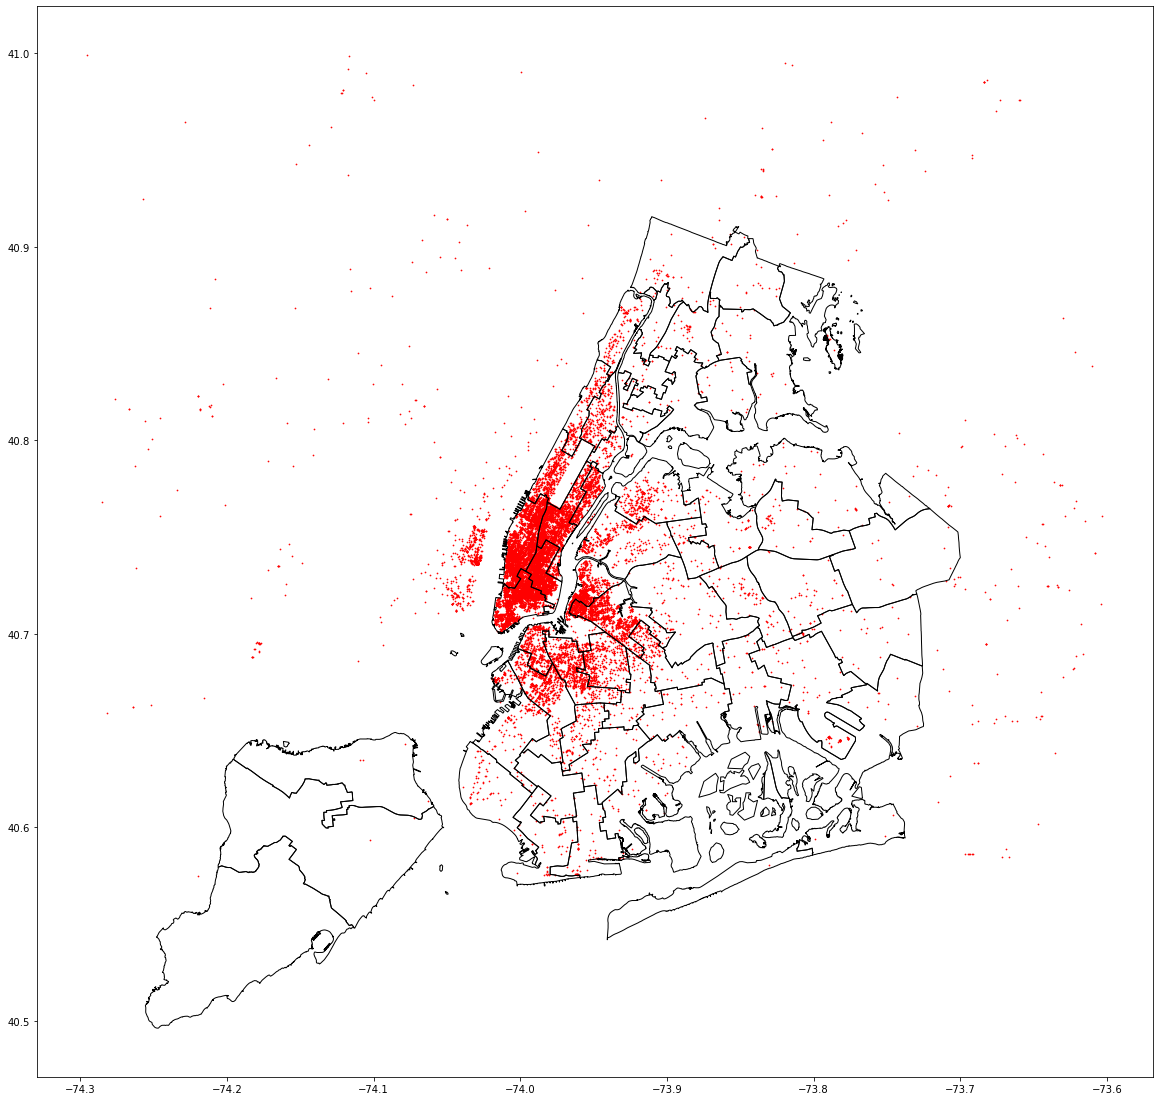

In [61]:
ax = gdfb.plot(figsize = (20,20), color = 'red', markersize = 0.5 )
nycmap.plot(color = 'none',edgecolor = 'black', ax = ax)

# Plotting the complete dataset on the NYC map

In [62]:
gdf = gpd.GeoDataFrame(uberf, geometry = gpd.points_from_xy(uberf.Lon,uberf.Lat))

<AxesSubplot:>

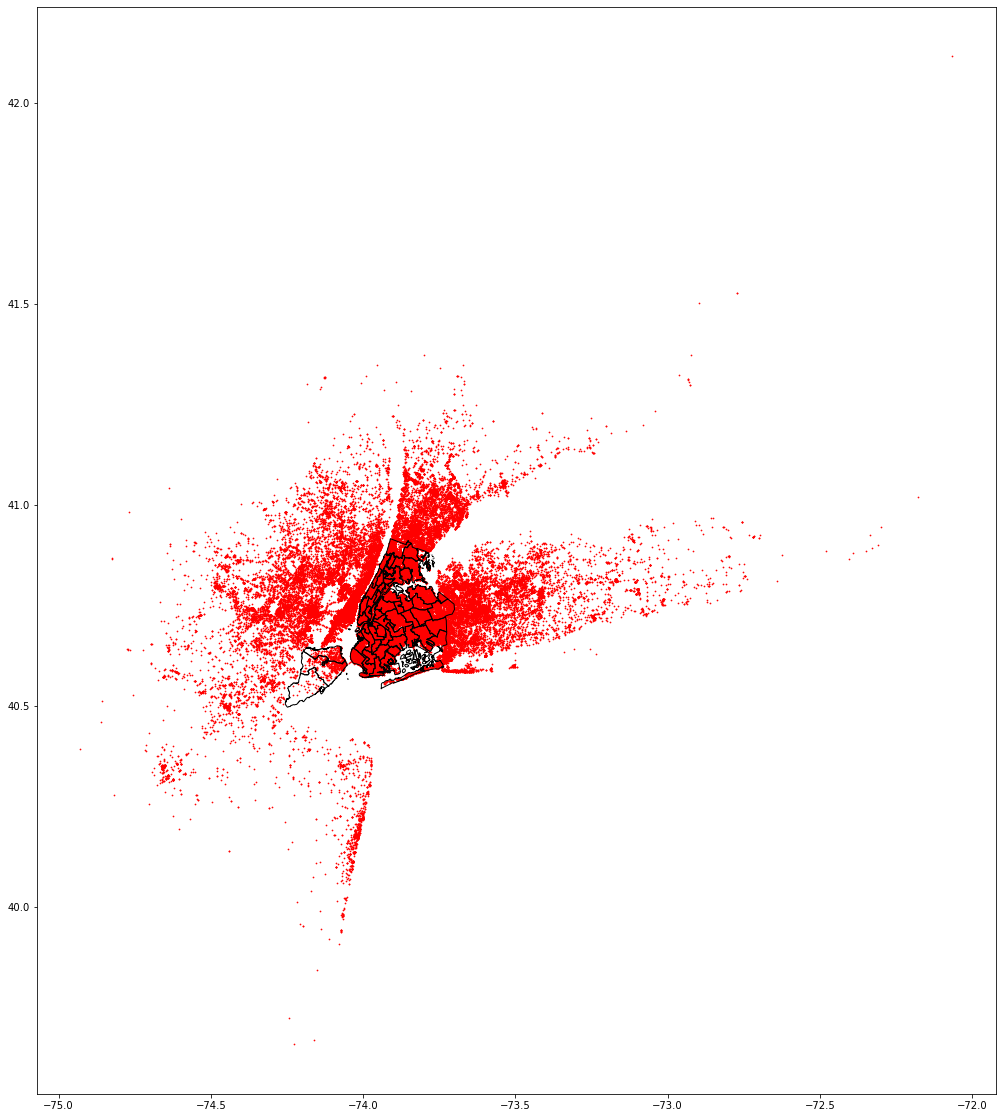

In [63]:
ax = gdf.plot(figsize = (20,20), color = 'red', markersize = 0.5 )
nycmap.plot(color = 'none',edgecolor = 'black', ax = ax)